#  **DATA IMPORT AND RUN**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv('laptop_data.csv') # upload the data

In [ ]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


#  **DATA CLEANING**

In [ ]:
df.shape # shape of the data

(1303, 12)

In [ ]:
df.info() # information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [ ]:
df.describe()   # describe the data

,Unnamed: 0,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


In [ ]:
df.duplicated().sum() # no. of duplicate values

np.int64(0)

In [ ]:
df.isnull().sum() # no. of null values

,0
Unnamed: 0,0
Company,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0
OpSys,0


In [ ]:
df.drop(columns=['Unnamed: 0'],inplace=True) # drop the column

In [ ]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232


In [ ]:
# replace the GB and kg  in clumns Ram and weight
df['Ram']=df['Ram'].str.replace('GB','')
df['Weight']=df['Weight'].str.replace('kg','')

In [ ]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232


In [ ]:
# convert into int. and float of columns ram and weights
df['Ram']=df['Ram'].astype('int32')
df['Weight']=df['Weight'].astype('float32')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


#  **EDA(Exploratory Data Analysis)=Exploring the dataset visually and statistically before (and after) fitting a model**

/tmp/ipython-input-2880938340.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price']) # Useful for understanding shape, skewness, spread of data.


<Axes: xlabel='Price', ylabel='Density'>

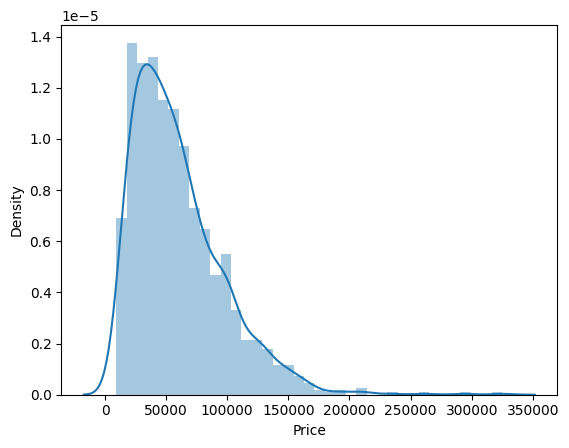

In [ ]:
sns.distplot(df['Price']) # Useful for understanding shape, skewness, spread of data.

<Axes: xlabel='Company'>

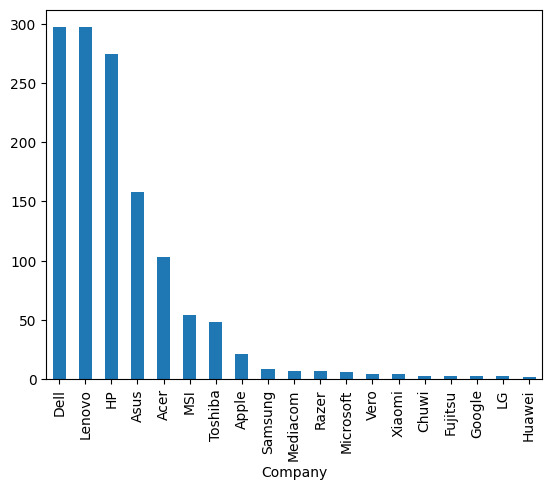

In [ ]:
df['Company'].value_counts().plot(kind='bar') # check distribution between no.of compainies


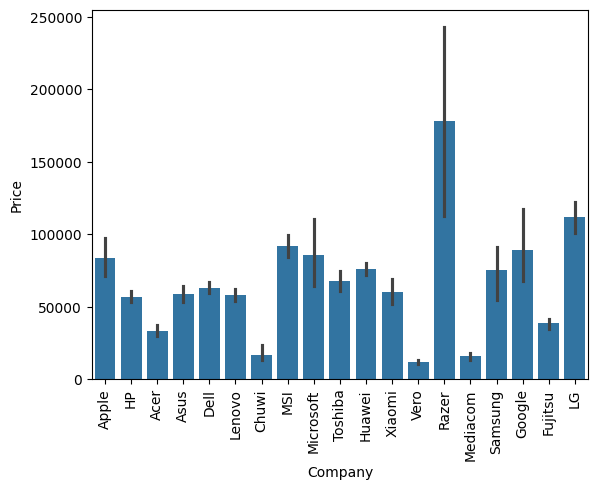

In [ ]:
sns.barplot(x=df['Company'],y=df['Price']) # distribution between company and prices
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='TypeName'>

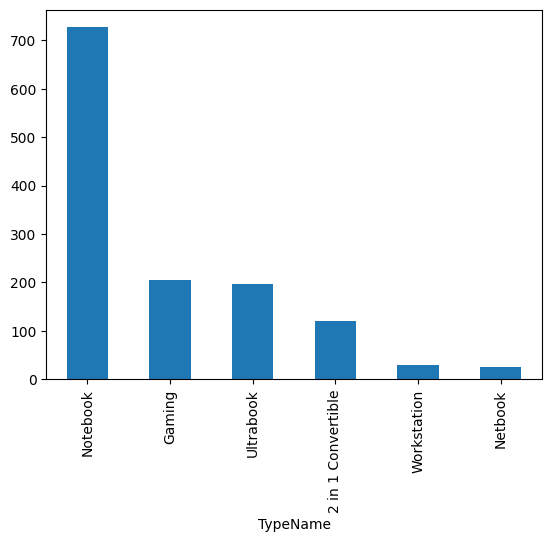

In [ ]:
df['TypeName'].value_counts().plot(kind='bar') # distribution typenames

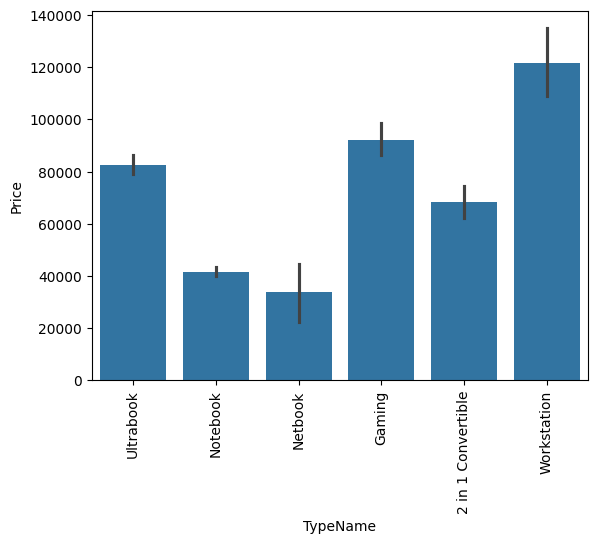

In [ ]:
sns.barplot(x=df['TypeName'],y=df['Price']) # distribution between typename and prices
plt.xticks(rotation='vertical')
plt.show()

/tmp/ipython-input-1439577752.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Inches'])


<Axes: xlabel='Inches', ylabel='Density'>

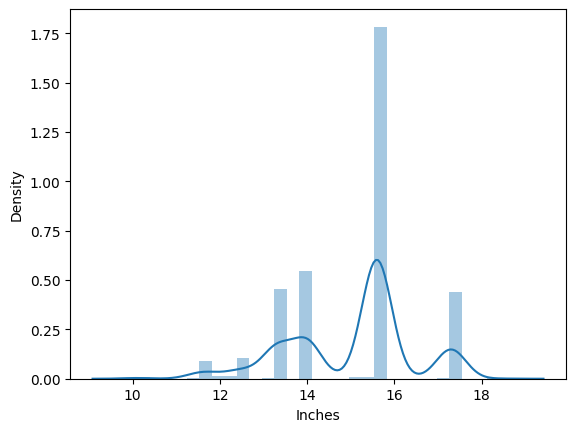

In [ ]:
sns.distplot(df['Inches'])

<Axes: xlabel='Inches', ylabel='Price'>

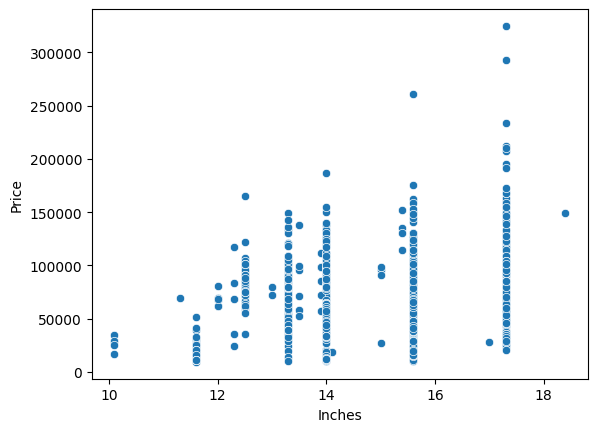

In [ ]:
sns.scatterplot(x=df['Inches'],y=df['Price']) # scatterplot b/t inches and price

# **Now work on ScreenResolution column**

In [ ]:
df['ScreenResolution'].value_counts().head() # no. of SCs

,count
ScreenResolution,
Full HD 1920x1080,507
1366x768,281
IPS Panel Full HD 1920x1080,230
IPS Panel Full HD / Touchscreen 1920x1080,53
Full HD / Touchscreen 1920x1080,47


In [ ]:
 # check no. of touchscreen leptops and creare a new column as touchscreen
df['Touchscreen']=df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
df['Touchscreen'].value_counts()

,count
Touchscreen,
0,1111
1,192


<Axes: xlabel='Touchscreen', ylabel='Price'>

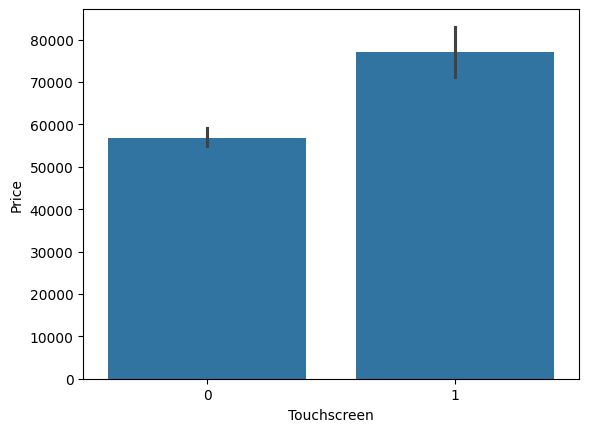

In [ ]:
sns.barplot(x=df['Touchscreen'],y=df['Price']) # barplot

In [ ]:
df['Ips']=df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0) # check no. of Ips
df['Ips'].value_counts()

,count
Ips,
0,938
1,365


<Axes: xlabel='Ips', ylabel='Price'>

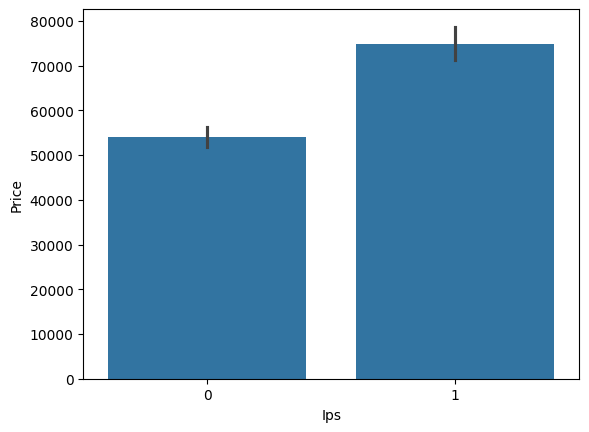

In [ ]:
sns.barplot(x=df['Ips'],y=df['Price'])

In [ ]:
# split the column screenresolution size in two columns x and y with type of object
new = df['ScreenResolution'].str.split('x',n=1,expand=True)
df['X_res'] = new[0] # with text
df['Y_res'] = new[1]
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0]) # now without text

In [ ]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
1080,Lenovo,Ultrabook,12.5,IPS Panel Touchscreen 2560x1440,Intel Core M 6Y75 1.2GHz,8,512GB SSD,Intel HD Graphics 515,Windows 10,0.99,74538.72,1,1,2560,1440
894,MSI,Gaming,17.3,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 6700HQ 2.6GHz,16,512GB SSD + 2TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.43,141138.72,0,1,3840,2160
1183,Acer,Notebook,15.6,1366x768,Intel Celeron Dual Core N3350 2GHz,4,500GB HDD,Intel HD Graphics 500,Windows 10,2.10,17742.24,0,0,1366,768
227,Asus,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Nvidia GeForce 920MX,Windows 10,2.00,40972.32,0,0,1920,1080
510,Dell,Ultrabook,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8,128GB SSD,Intel HD Graphics 620,Windows 10,1.29,47898.72,1,1,1920,1080


In [ ]:
# change the type of new colunms
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   int64  
 14  Y_res             1303 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64(4), object(7)
memory usage: 142.6+ KB


In [ ]:
# check correlation with price
df.corr(numeric_only=True)['Price']

,Price
Inches,0.068197
Ram,0.743007
Weight,0.210370
Price,1.000000
Touchscreen,0.191226
Ips,0.252208
X_res,0.556529
Y_res,0.552809


In [ ]:
# find ppi = pixel per inches
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')

In [ ]:
# here strong correlation between price and (ram,ppi)
df.corr(numeric_only=True)['Price']

# now conclude that price depends on ScreenResolution

,Price
Inches,0.068197
Ram,0.743007
Weight,0.210370
Price,1.000000
Touchscreen,0.191226
Ips,0.252208
X_res,0.556529
Y_res,0.552809
ppi,0.473487


#  now conclude that price depends on ScreenResolution

In [ ]:
# now we don't need the columns screenresulation,inches,x_res and y_res
df.drop(columns=['ScreenResolution'],inplace=True)
df.drop(columns=['Inches','X_res','Y_res'],inplace=True)
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


# **Now work on Cpu column**

In [ ]:
df['Cpu'].value_counts()


,count
Cpu,
Intel Core i5 7200U 2.5GHz,190
Intel Core i7 7700HQ 2.8GHz,146
Intel Core i7 7500U 2.7GHz,134
Intel Core i7 8550U 1.8GHz,73
Intel Core i5 8250U 1.6GHz,72
...,...
Intel Core i5 7200U 2.70GHz,1
Intel Core M M7-6Y75 1.2GHz,1
Intel Core M 6Y54 1.1GHz,1


In [ ]:
# split the cpu column and create a new column and store till three words
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [ ]:
# create a function and access to prosessor
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [ ]:
# again create a new column and store till three words
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name,Cpu brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


<Axes: xlabel='Cpu brand'>

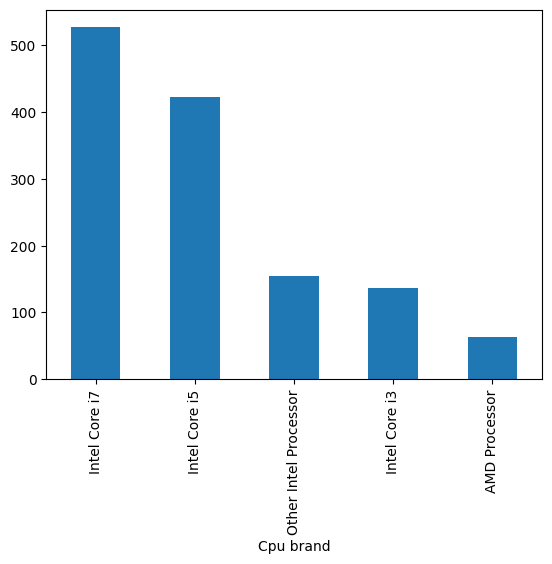

In [ ]:
df['Cpu brand'].value_counts().plot(kind='bar')

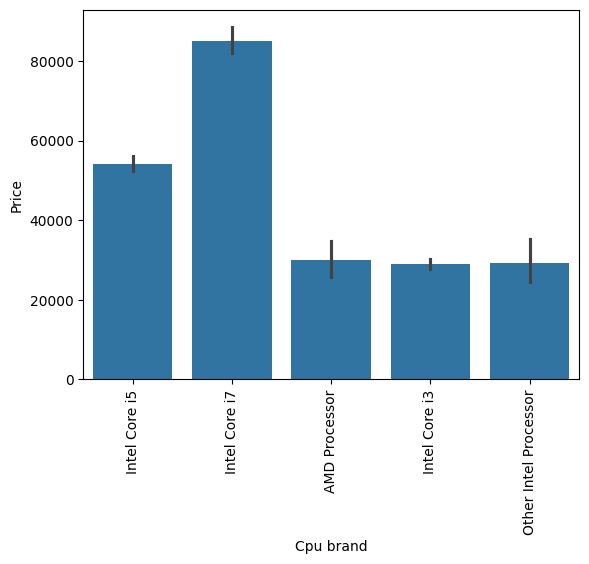

In [ ]:
sns.barplot(x=df['Cpu brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()
# now we conclude that Price depends on processor (mostly on i5 and i7)

# now we conclude that Price depends on processor (mostly on i5 and i7)

In [ ]:
df.drop(columns=['Cpu','Cpu Name'],inplace=True)
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


# **Now work on Ram column**

<Axes: xlabel='Ram'>

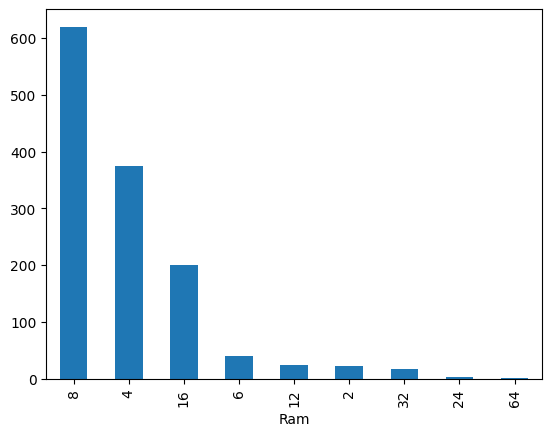

In [ ]:
df['Ram'].value_counts().plot(kind='bar')

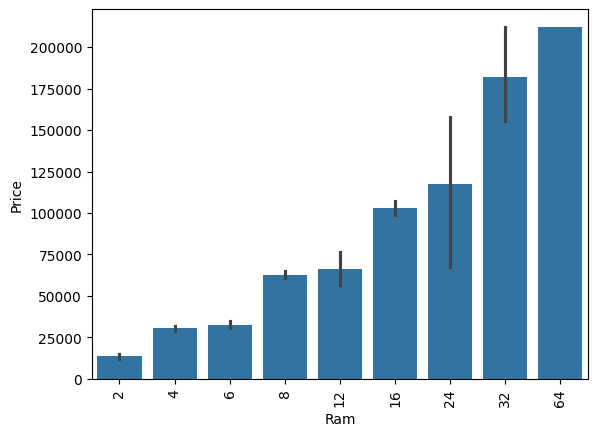

In [ ]:
sns.barplot(x=df['Ram'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

# we conclude that price depend on Ram also mostly 8 and 4

# **Now work on Memory column**

In [ ]:
df['Memory'].value_counts()

,count
Memory,
256GB SSD,412
1TB HDD,223
500GB HDD,132
512GB SSD,118
128GB SSD + 1TB HDD,94
128GB SSD,76
256GB SSD + 1TB HDD,73
32GB Flash Storage,38
2TB HDD,16


In [ ]:
# now split the memory column and create new columns HDD,	SSD,	Hybrid,	Flash_Storage

In [ ]:
df['Memory'] = df['Memory'].astype(str).replace(r'\.0', '', regex=True)

df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')

df["first"] = df["first"].str.replace(r'\D', '', regex=True).astype(int)
df["second"] = df["second"].str.replace(r'\D', '', regex=True).astype(int)


df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

/tmp/ipython-input-3430530273.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["second"].fillna("0", inplace = True)


In [ ]:
df.drop(columns=['Memory'],inplace=True)
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [ ]:
df.corr(numeric_only=True)['Price']

,Price
Ram,0.743007
Weight,0.210370
Price,1.000000
Touchscreen,0.191226
Ips,0.252208
ppi,0.473487
HDD,-0.096441
SSD,0.670799
Hybrid,0.007989
Flash_Storage,-0.040511


# now we conclude that strong correlation with price and SSD , not with HDD and flash_storage

In [ ]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256


# Now work on Gpu Column with graphics card in leptops

In [ ]:
df['Gpu'].value_counts()

,count
Gpu,
Intel HD Graphics 620,281
Intel HD Graphics 520,185
Intel UHD Graphics 620,68
Nvidia GeForce GTX 1050,66
Nvidia GeForce GTX 1060,48
...,...
Nvidia Quadro M500M,1
AMD Radeon R7 M360,1
Nvidia Quadro M3000M,1


In [ ]:
# split the column and create new col
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [ ]:
df['Gpu brand'].value_counts()

,count
Gpu brand,
Intel,722
Nvidia,400
AMD,180
ARM,1


In [ ]:
# deleate the ARM graphices
df = df[df['Gpu brand'] != 'ARM']
df['Gpu brand'].value_counts()

,count
Gpu brand,
Intel,722
Nvidia,400
AMD,180


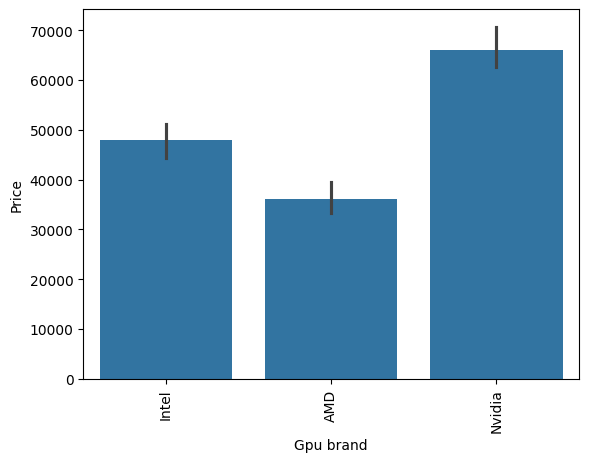

In [ ]:
sns.barplot(x=df['Gpu brand'],y=df['Price'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df.drop(columns=['Gpu'],inplace=True)
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


# **Now we conclude that price is depend on graphics mostly on Nvidia,intel and AMD**

# NOW WORK ON Operator System column

In [ ]:
df['OpSys'].value_counts()

,count
OpSys,
Windows 10,1072
No OS,66
Linux,62
Windows 7,45
Chrome OS,26
macOS,13
Mac OS X,8
Windows 10 S,8
Android,2


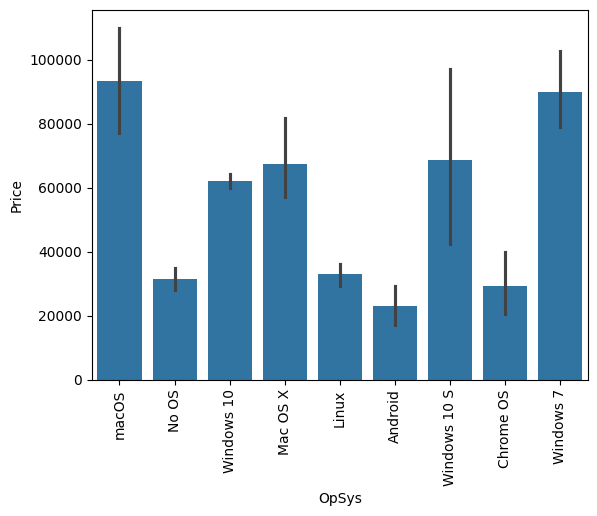

In [ ]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# now we can create three categories of opsys and create new col. of os
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [ ]:
df['os'] = df['OpSys'].apply(cat_os)
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [ ]:
df.drop(columns=['OpSys'],inplace=True)

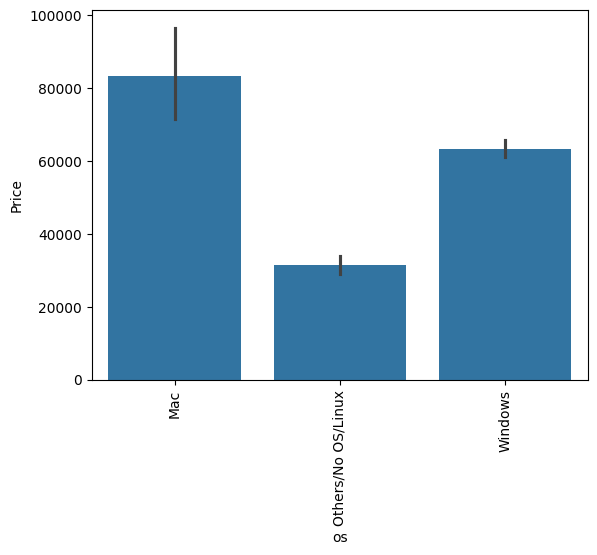

In [ ]:
sns.barplot(x=df['os'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

# **we can coluded that price is mostly depands on Mac, Windows**

# Now work on weight column

/tmp/ipython-input-1125578356.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

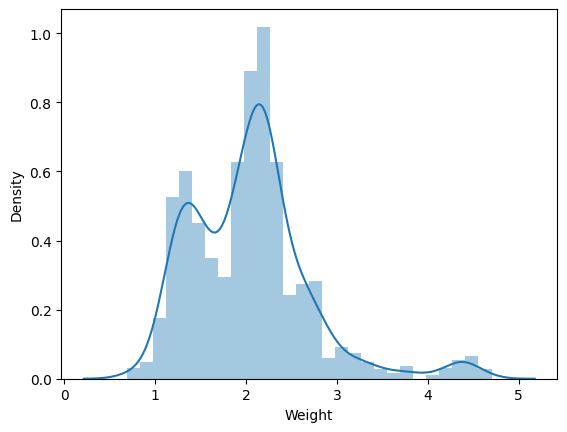

In [ ]:
sns.distplot(df['Weight'])

<Axes: xlabel='Weight', ylabel='Price'>

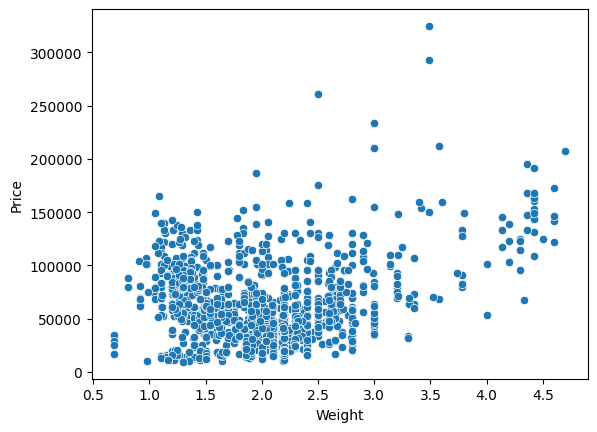

In [ ]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

In [ ]:
df.corr(numeric_only=True)['Price']

,Price
Ram,0.742905
Weight,0.209867
Price,1.000000
Touchscreen,0.192917
Ips,0.253320
ppi,0.475368
HDD,-0.096891
SSD,0.670660


<Axes: >

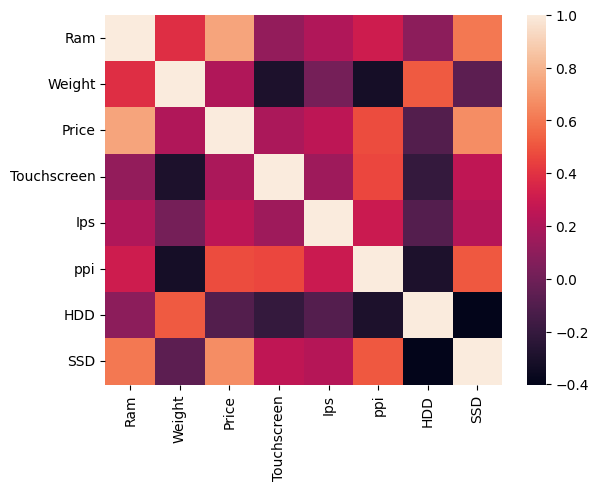

In [ ]:
sns.heatmap(df.corr(numeric_only=True))

/tmp/ipython-input-3329408040.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((df['Price']))


<Axes: xlabel='Price', ylabel='Density'>

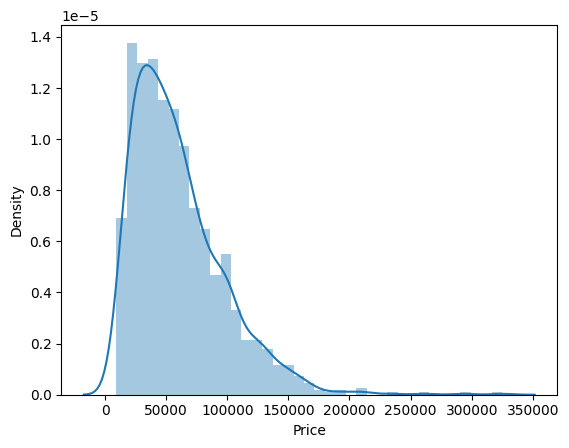

In [ ]:
sns.distplot((df['Price']))

/tmp/ipython-input-630414448.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price']))


<Axes: xlabel='Price', ylabel='Density'>

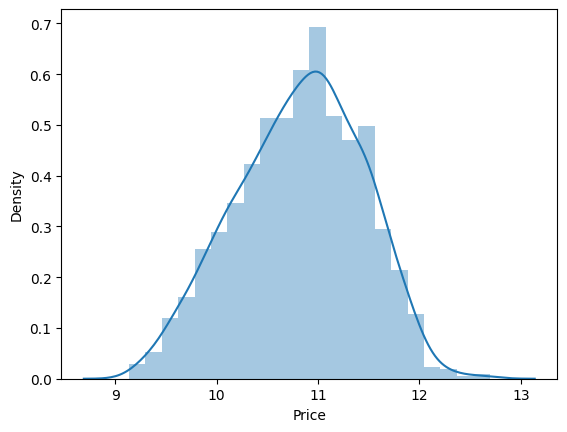

In [ ]:
# here price column are positively skewed , so we can removed skewness
# beceause its effect on R-squared value (increase after that , i.e. is good)
sns.distplot(np.log(df['Price']))

# **here price column are positively skewed , so we can removed skewness beceause its effect on R-squared value (increase after that , i.e. is good)**

# **Testing the Correct Algorithm**

In [ ]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [ ]:
X

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [ ]:
y

,Price
0,11.175755
1,10.776777
2,10.329931
3,11.814476
4,11.473101
...,...
1298,10.433899
1299,11.288115
1300,9.409283
1301,10.614129


In [ ]:
# here test size 15% and random_state = seed value
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [ ]:
X_train.shape,X_test.shape

((1106, 12), (196, 12))

In [ ]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
183,Toshiba,Notebook,8,2.00,0,0,100.454670,Intel Core i5,0,128,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,141.211998,Intel Core i7,1000,128,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,135.094211,Other Intel Processor,0,0,Intel,Others/No OS/Linux
1020,Dell,2 in 1 Convertible,4,2.08,1,1,141.211998,Intel Core i3,1000,0,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,141.211998,Intel Core i5,1000,128,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,2000,0,Nvidia,Others/No OS/Linux


## Libraries
### ColumnTransformer = one place to handle multiple types of preprocessing for different columns.

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder # for textual data column
from sklearn.metrics import r2_score,mean_absolute_error

In [ ]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

## Now diff-diff ML algorithems

# **Linear Regression**
### Linear Regression (LR) is a supervised learning algorithm used to model the relationship between input features and a continuous target variable by fitting the best straight line. It predicts outcomes by finding coefficients (weights) that minimize the difference between actual and predicted values.

In [ ]:
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first', handle_unknown='ignore'),
                                       [0,1,7,10,11])],remainder='passthrough')
step2=LinearRegression()
pipe=Pipeline([('step1',step1),('step2',step2)])

pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))


R2 score 0.807327744841864
MAE 0.21017827976428802


# **Ridge Regression(L2-Regularization)**
### **Ridge Regression** is a type of linear regression that adds an L2 regularization penalty (squared magnitude of coefficients) to the loss function. This helps reduce overfitting by shrinking large coefficients and is especially useful when features are highly correlated (multicollinearity).


In [ ]:
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first', handle_unknown='ignore'),
                                       [0,1,7,10,11])],remainder='passthrough')
step2=Ridge(alpha=15)
pipe=Pipeline([('step1',step1),('step2',step2)])

pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8129022475925666
MAE 0.20955629363707778


# **Lasso Regression(L1-Regularization)**
### **Lasso Regression** is a linear regression technique that uses L1 regularization (absolute values of coefficients) in the loss function. It not only reduces overfitting but can also shrink some coefficients to zero, effectively performing feature selection.


In [ ]:
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first', handle_unknown='ignore'),
                                       [0,1,7,10,11])],remainder='passthrough')
step2=Lasso(alpha=0.0002)
pipe=Pipeline([('step1',step1),('step2',step2)])

pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8090658667716553
MAE 0.20968888855458054


# **KNN(K-Nearest Neighbour)**
### **KNN** is a supervised learning algorithm used for classification and regression. It predicts the output for a data point based on the majority class (for classification) or average value (for regression) of its **k closest neighbors** in the feature space.


In [ ]:
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first', handle_unknown='ignore'),
                                       [0,1,7,10,11])],remainder='passthrough')
step2=KNeighborsRegressor(n_neighbors=3,metric='manhattan')
pipe=Pipeline([('step1',step1),('step2',step2)])

pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8201573110729345
MAE 0.18143153069623585


# **Decision Tree**
### Decision Tree is a supervised learning algorithm used for classification and regression. It splits the data into branches based on feature values, creating a tree-like structure where each leaf represents a predicted outcome, making decisions easy to interpret.


In [ ]:
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first', handle_unknown='ignore'),
                                       [0,1,7,10,11])],remainder='passthrough')
step2=DecisionTreeRegressor(max_depth=8)
pipe=Pipeline([('step1',step1),('step2',step2)])

pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8385812743517904
MAE 0.18343987089364577


# **SVM(Support Vector machine)**
### SVM is a supervised learning algorithm used for classification and regression. It finds the optimal hyperplane that **maximally separates classes** in the feature space, and can use kernel(Radial basis function) functions to handle non-linear data.
### C parameter: balances accuracy vs. generalization.


In [ ]:
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first', handle_unknown='ignore'),
                                       [0,1,7,10,11])],remainder='passthrough')
step2=SVR(kernel='rbf',C=10000,epsilon=0.1)
pipe=Pipeline([('step1',step1),('step2',step2)])

pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8083180902272435
MAE 0.20239059427315706


# **Random Forest**
### **Random Forest** is an ensemble learning algorithm that builds many decision trees on random subsets of data and features, then combines their predictions. It reduces overfitting, improves accuracy, and works well for both classification and regression tasks by averaging results (regression) or using majority vote (classification).


In [ ]:
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first', handle_unknown='ignore'),
                                       [0,1,7,10,11])],remainder='passthrough')
step2=RandomForestRegressor(n_estimators=140,
                                          random_state=4,
                                          max_samples=0.7,
                                          max_features=0.76,
                                          max_depth=12,)

pipe=Pipeline([('step1',step1),('step2',step2)])

pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8895071737484904
MAE 0.15630176326383555


# So we concude that random forest is most better accuracy insteed of all ML algorithm

### if i'm hyperparameter tunning then i'm improve accuray 0.8 %

In [ ]:
# from sklearn.model_selection import GridSearchCV
# step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),
#                                        [0,1,7,10,11])],remainder='passthrough')
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [8, 12, 16],
#     'max_features': [0.5, 0.7, 1.0],
#     'max_samples': [0.6, 0.8, 1.0]
# }
# step2= GridSearchCV(RandomForestRegressor(random_state=4), param_grid, cv=5, scoring='r2')

# pipe=Pipeline([('step1',step1),('step2',step2)])

# pipe.fit(X_train,y_train)
# y_pred=pipe.predict(X_test)

# print('R2 score',r2_score(y_test,y_pred))
# print('MAE',mean_absolute_error(y_test,y_pred))

# **Extra Trees(Extremely Randomized Trees)**
### **Extra Trees** is an ensemble algorithm similar to Random Forest but adds more randomness by choosing split points randomly instead of the best split. This often makes training faster, reduces variance, and can improve generalization in both classification and regression tasks.


In [ ]:
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first', handle_unknown='ignore'),
                                       [0,1,7,10,11])],remainder='passthrough')
step2=ExtraTreesRegressor(n_estimators=140,
                                          random_state=4,
                                          max_samples=0.7,
                                          max_features=0.76,
                                          bootstrap=True,
                                          max_depth=12,)

pipe=Pipeline([('step1',step1),('step2',step2)])

pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8852883439797987
MAE 0.1593757495795908


# **AdaBoost (Adaptive Boosting)**
### **AdaBoost** is an ensemble learning algorithm that combines multiple weak learners, usually decision trees, to create a strong predictive model. It works by sequentially training learners, giving higher weight to misclassified samples, so the model focuses on harder cases and improves overall accuracy.


In [ ]:
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first', handle_unknown='ignore'),
                                       [0,1,7,10,11])],remainder='passthrough')
step2=AdaBoostRegressor(n_estimators=15,learning_rate=1.0)
pipe=Pipeline([('step1',step1),('step2',step2)])

pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7926939111186858
MAE 0.22915293857119345


# **Gradient Boosting**

### **Gradient Boosting** is an ensemble technique that builds models sequentially, where each new model tries to correct the errors of the previous ones. It combines multiple weak learners, usually decision trees, to create a strong predictive model with improved accuracy, often used for regression and classification tasks.


In [ ]:
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first', handle_unknown='ignore'),
                                       [0,1,7,10,11])],remainder='passthrough')
step2=GradientBoostingRegressor(n_estimators=300,learning_rate=0.1)
pipe=Pipeline([('step1',step1),('step2',step2)])

pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8844710885001776
MAE 0.1615008376182604


# **XGBoost (Extreme Gradient Boosting)**
### **XGBoost** is an efficient and scalable implementation of gradient boosting that uses decision trees as weak learners. It improves model performance by handling missing values, regularizing to reduce overfitting, and using parallel computation for faster training, making it very popular for both regression and classification tasks.


In [ ]:
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first', handle_unknown='ignore'),
                                       [0,1,7,10,11])],remainder='passthrough')
step2=XGBRegressor(n_estimators=25,learning_rate=0.6,max_depth=5)
pipe=Pipeline([('step1',step1),('step2',step2)])

pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8922835706028767
MAE 0.15614013729109194


# XGBoost is all better accuracy

# **Voting Regressor**
### A **Voting Regressor** is an ensemble method that combines predictions from multiple regression models to improve accuracy. It works by averaging the predictions of individual regressors, making the final output more robust and reliable.


In [ ]:
from sklearn.ensemble import VotingRegressor, RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error

# Preprocessing
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), [0,1,7,10,11])
    ],
    remainder='passthrough'
)

# Regressors
rf = RandomForestRegressor(
    n_estimators=250,
    random_state=4,
    max_samples=0.6,
    max_features=0.75,
    max_depth=15,
    bootstrap=True  )
gbdt = GradientBoostingRegressor(n_estimators=100, max_features=0.6)

xgb = XGBRegressor(n_estimators=25, learning_rate=0.3, max_depth=15)

et = ExtraTreesRegressor(
    n_estimators=120,
    random_state=4,
    max_samples=0.6,
    max_features=0.75,
    max_depth=15,
    bootstrap=True
)

# Voting Regressor
step2 = VotingRegressor(
    estimators=[('rf', rf), ('gbdt', gbdt), ('xgb', xgb), ('et', et)],
    weights=[5,1,1,1]
)

# Pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit and predict
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

# Evaluation
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R2 score: 0.8926882129308812
MAE: 0.15390637979692176


# **Stacking**
### A **Stacking Regressor** is an ensemble method that combines multiple regression models by training a **meta-model** on the predictions of base models. It leverages the strengths of different regressors to improve overall prediction accuracy and reduce errors.


In [ ]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), [0,1,7,10,11])
], remainder='passthrough')


estimators = [
    ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    ('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8768896800858426
MAE 0.16731612621668085


# **Now we conclude that Random Forest and XGBoost both are good algorithm for better accuracy**

# **Exporting the Model**
### **pickle** :This is useful when you want to save models, dataframes, or any Python objects for later use without retraining or recomputing.
### 'df.pkl' is the filename where it will be saved.
### 'wb' means write in binary mode.

In [ ]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [ ]:
from google.colab import files

files.download("df.pkl")
files.download("pipe.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df.head(5)

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
